## Exploratory data analysis, Visualization and Q. -answering  Pipeline Accidents in the US , 2010 On  - 

In [38]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math

import os,sys
import copy
from pipelineAccidentAnalyser import CrudePipeLineAnalysis#, time_cost_model_n_plot, density_mix, plot_correlation_map
from pandas.errors import MergeError, EmptyDataError, ParserError, \
    InvalidIndexError, DtypeWarning, DuplicateLabelError

## Create an instance of the pipeline analysis class
Oilpipeline_1 = CrudePipeLineAnalysis()

# a constant when looking at data series ahead...
MEDIUM_ROW_NUMS = 25

In [23]:
# name your csv file "database.csv" and place it in the current working directory,

data_file = './database.csv'

try:
    data = pd.read_csv(data_file)
except FileNotFoundError as e:
    print("Excel file not found " + str(e) + ' -- please ensure The file is in your current working directory, now exiting program...')
    #return False

except IOError as e:
    print("invalid data format encountered in file " + str(e) + ' -- please ensure The file content is in the corre3ct format, now exiting program...')
    #return False

except Exception as err:
    print('Specific error is : ' + str(err))
    #return False


pd.set_option("display.max_columns", None)
#pd.set_option("display.max_rows", None)
data.head(1300)


Report Number  Supplemental Number  Accident Year   Accident Date/Time  \
0          20100016                17305           2010     1/1/2010 7:15 AM   
1          20100254                17331           2010     1/4/2010 8:30 AM   
2          20100038                17747           2010    1/5/2010 10:30 AM   
3          20100260                18574           2010     1/6/2010 7:30 PM   
4          20100030                16276           2010     1/7/2010 1:00 PM   
5          20100021                17161           2010    1/8/2010 11:38 PM   
6          20110036                18052           2010    1/9/2010 12:15 AM   
7          20100255                18584           2010     1/9/2010 1:12 AM   
8          20100261                18050           2010    1/10/2010 7:46 PM   
9          20100024                18390           2010    1/11/2010 2:30 PM   
10         20100150                15205           2010    1/11/2010 2:30 PM   
11         20100262                15399           2010    1/11/2010 2:47 PM   
12         20100234                18134           2010    1/11/2010 3:00 PM   
13         20100026                17874           2010   1/11/2010 11:00 PM   
14         20100106                17751           2010   1/12/2010 10:25 AM   
15         20100082                17824           2010    1/12/2010 2:30 PM   
16         20100037                18592           2010    1/12/2010 7:08 PM   
17         20100025                17505           2010    1/13/2010 7:36 AM   
18         20110071                18051           2010    1/13/2010 1:30 PM   
19         20100100                17975           2010    1/13/2010 3:30 PM   
20         20100057                17557           2010    1/14/2010 1:15 PM   
21         20110083                17836           2010    1/15/2010 7:05 AM   
22         20100231                15700           2010    1/15/2010 3:00 PM   
23         20100071                17807           2010   1/18/2010 10:00 AM   
24         20100031                17419           2010    1/19/2010 1:10 PM   
25         20100087                18354           2010    1/19/2010 8:00 PM   
26         20100091                17835           2010    1/21/2010 9:30 AM   
27         20100177                15873           2010   1/21/2010 12:30 PM   
28         20100257                17800           2010    1/21/2010 6:43 PM   
29         20120021                17357           2010   1/22/2010 12:05 PM   
30         20100072                17806           2010   1/24/2010 12:30 PM   
31         20100017                20768           2010   1/25/2010 11:07 AM   
32         20100018                17492           2010    1/27/2010 3:30 PM   
33         20100084                17313           2010   1/28/2010 11:00 AM   
34         20110376                17761           2010     2/2/2010 8:00 AM   
35         20100244                17856           2010     2/4/2010 3:10 PM   
36         20100032                17394           2010    2/6/2010 11:30 AM   
37         20100233                18026           2010    2/8/2010 12:20 PM   
38         20100256                17808           2010    2/9/2010 10:00 AM   
39         20100253                17861           2010     2/9/2010 3:25 PM   
40         20100001                15751           2010    2/16/2010 7:42 AM   
41         20100036                17417           2010    2/17/2010 5:45 PM   
42         20100004                19086           2010    2/19/2010 6:50 AM   
43         20100009                17618           2010    2/20/2010 6:30 AM   
44         20100005                17663           2010   2/21/2010 12:45 PM   
45         20100003                18021           2010   2/22/2010 10:38 AM   
46         20100006                17891           2010   2/22/2010 10:56 AM   
47         20100007                17296           2010   2/23/2010 11:30 PM   
48         20100008                19253           2010    2/25/2010 4:50 AM   
49    

In [3]:
data_good_cols = data.drop(columns=['Pipeline Shutdown', 'Shutdown Date/Time',
       'Restart Date/Time', 'Public Evacuations', 'Operator Employee Injuries',
       'Operator Contractor Injuries', 'Emergency Responder Injuries',
       'Other Injuries', 'Public Injuries', 'All Injuries',
       'Operator Employee Fatalities', 'Operator Contractor Fatalities',
       'Emergency Responder Fatalities', 'Other Fatalities',
       'Public Fatalities', 'All Fatalities'])


In [18]:
# before accessing columns, ensure no errors are made by assigning variables to the correct strings 
# (this will @ least reduce human error):
#data.columns;

Report_Number      = 'Report Number'
Accident_Year      = 'Accident Year'
Accident_Date_Time = 'Accident Date/Time'
Pipeline_Type      = 'Pipeline Type'
Liquid_Type        = 'Liquid Type'                 
Liquid_Subtype     = 'Liquid Subtype'                 
Liquid_Name        = 'Liquid Name'                
Cause_Category     = 'Cause Category'                 
Cause_Subcategory  = 'Cause Subcategory'                
Unintentional_Release_Barrels = 'Unintentional Release (Barrels)'                 
Intentional_Release_Barrels   = 'Intentional Release (Barrels)'                
Liquid_Recovery_Barrels       = 'Liquid Recovery (Barrels)'                
Net_Loss_Barrels   = 'Net Loss (Barrels)'                
Liquid_Ignition    = 'Liquid Ignition'                
Liquid_Explosion   = 'Liquid Explosion'                 
All_Injuries       = 'All Injuries'                
All_Fatalities     = 'All Fatalities'      
All_Costs          = 'All Costs'       

In [5]:
important_cols = [ Report_Number,
Accident_Year ,
 Accident_Date_Time,
Pipeline_Type  ,
Liquid_Type    ,
 Liquid_Subtype , 
 Liquid_Name    , 
 Cause_Category ,
Cause_Subcategory,
Net_Loss_Barrels,
Liquid_Ignition ,
Liquid_Explosion,
All_Costs]

In [6]:
# make a copy(non shallow so altering the copied data struct doesn indirectly alter the original)
# of the data filtered as you wish
# also filter out the non - numeric data so we can encode and do a fuller correlation map
try:
    relevant_data = copy.deepcopy(data[ important_cols])
    relevant_data_non_numeric = relevant_data[ important_cols[3:9]]
except (KeyError,IndexError, EmptyDataError, InvalidIndexError) as err:
    print("Got an error trying to filter columns and indices here , specific error(s) is :")
    print(err)
    pass

relevant_data_non_numeric.shape;


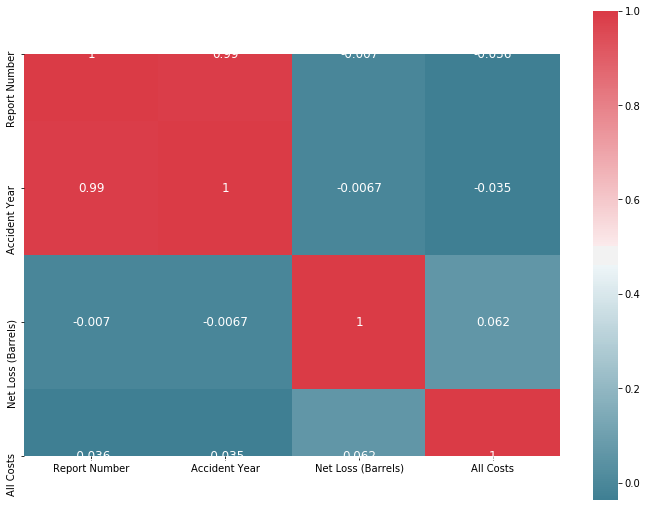

In [11]:
## Lets look at all the cross correlations here to see what factors can be causal on others etc.
        
#plot_correlation_map(relevant_data)  
Oilpipeline_1.plot_correlation_map(relevant_data)

In [4]:
data_liq_type = data[Liquid_Type];
data[Liquid_Type].unique()

array(['HVL OR OTHER FLAMMABLE OR TOXIC FLUID, GAS', 'CRUDE OIL',
       'REFINED AND/OR PETROLEUM PRODUCT (NON-HVL), LIQUID',
       'CO2 (CARBON DIOXIDE)',
       'BIOFUEL / ALTERNATIVE FUEL(INCLUDING ETHANOL BLENDS)'],
      dtype=object)

In [5]:
uniq_data_liquid_types = data_liq_type.unique()

In [11]:
# trying to answer the Questions :

In [26]:
# Net barrel loss by liquid type
LiquidDamage = data.groupby(Liquid_Type)[Net_Loss_Barrels].sum().sort_values(ascending=False);

In [27]:
LiquidDamage

Liquid Type
HVL OR OTHER FLAMMABLE OR TOXIC FLUID, GAS              251938.68
CRUDE OIL                                                62605.21
REFINED AND/OR PETROLEUM PRODUCT (NON-HVL), LIQUID       46816.96
CO2 (CARBON DIOXIDE)                                      8121.52
BIOFUEL / ALTERNATIVE FUEL(INCLUDING ETHANOL BLENDS)         0.00
Name: Net Loss (Barrels), dtype: float64

In [28]:
# Net barrel loss by liquid type
data.columns
#LiquidNameDamage = data.groupby('Liquid Name')['Net Loss (Barrels)'].sum().sort_values(ascending=False);

Index(['Report Number', 'Supplemental Number', 'Accident Year',
       'Accident Date/Time', 'Operator ID', 'Operator Name',
       'Pipeline/Facility Name', 'Pipeline Location', 'Pipeline Type',
       'Liquid Type', 'Liquid Subtype', 'Liquid Name', 'Accident City',
       'Accident County', 'Accident State', 'Accident Latitude',
       'Accident Longitude', 'Cause Category', 'Cause Subcategory',
       'Unintentional Release (Barrels)', 'Intentional Release (Barrels)',
       'Liquid Recovery (Barrels)', 'Net Loss (Barrels)', 'Liquid Ignition',
       'Liquid Explosion', 'Pipeline Shutdown', 'Shutdown Date/Time',
       'Restart Date/Time', 'Public Evacuations', 'Operator Employee Injuries',
       'Operator Contractor Injuries', 'Emergency Responder Injuries',
       'Other Injuries', 'Public Injuries', 'All Injuries',
       'Operator Employee Fatalities', 'Operator Contractor Fatalities',
       'Emergency Responder Fatalities', 'Other Fatalities',
       'Public Fatalities', 'All

In [29]:
## how many accidents by liquid occurrence :
data[Liquid_Name].describe()


count         222
unique         69
top       PROPANE
freq           26
Name: Liquid Name, dtype: object

In [62]:
# most accidents by liquid type (name) :
data[Liquid_Name].value_counts()

PROPANE                                     26
ETHANE                                      24
Y-GRADE                                     23
ETHYLENE                                    17
PROPYLENE                                   15
CONDENSATE                                  13
NATURAL GASOLINE                            12
BUTANE                                      11
DILUTE PROPYLENE                             4
ISOBUTANE                                    4
ETHANE/PROPANE                               3
ETHANE/PROPANE MIX                           3
VACUUM GAS OIL                               3
NAPHTHA                                      3
REFINERY GRADE PROPYLENE (RGP)               3
Y GRADE                                      3
ETHANE/PROPANE BLEND                         2
14# NATURAL GASOLINE                         2
98.7% ETHANE, .97% METHANE, .36% PROPANE     1
VINYL ACETATE MONOMER                        1
NORMAL BUTANE                                1
JET FUEL     

In [46]:
# So , seeems to be the most flammable liquids like Ethane,propane , Etheleyene and condenstaes which 
# help cause accidents.
# These are all LPG - i.e hydrocarbons. Their chemical composition is only that of carbon and hydrogen atoms.

# Also when they are pure , rather than mixed this is clearly an issue, as mixtures at most cause 3 accidents over these years,
# whereas all pure liquids begining at BUTANE cause accidents in the tens , starting with BUtane at 11 alone !




In [39]:
# Do this by Cost :
data.groupby(Liquid_Name)[All_Costs].sum().sort_values(ascending=False)[:MEDIUM_ROW_NUMS]

Liquid Name
ETHYLENE                                    30168191
ETHANE                                      10142813
NATURAL GASOLINE                             9330100
NAPHTHA                                      6224130
CONDENSATE                                   3157053
PROPANE                                      2993626
PROPYLENE                                    2634977
RAW FEED                                     1599786
VINYL ACETATE MONOMER                        1470000
Y-GRADE                                      1138850
Y GRADE                                      1080897
BUTANE                                        882229
ETHANE/PROPANE MIX                            791290
REFINERY GRADE BUTANE                         721188
ISOBUTANE                                     672137
DILUTE PROPYLENE (PROPYLENE/PROPANE MIX)      632830
NO 6 FUEL OIL                                 437000
14# NATURAL GASOLINE                          432463
VACUUM GAS OIL                    

In [40]:
# Do this by Oil loss :
data.groupby(Liquid_Name)[Net_Loss_Barrels].sum().sort_values(ascending=False)[:MEDIUM_ROW_NUMS]

Liquid Name
ETHANE                                      67030.37
ETHANE/PROPANE MIX                          18491.00
RAW FEED                                    13718.00
PROPANE                                     10591.84
ETHANE/PROPANE                               5003.10
ETHYLENE                                     3542.90
PROPANE/BUTANE MIX                           3283.00
Y-GRADE                                      2876.39
NATURAL GASOLINE                             2552.56
ISOBUTANE                                    2504.10
NORMAL BUTANE                                2237.00
PROPYLENE                                    1021.42
ISO BUTANE                                    770.00
98.7% ETHANE, .97% METHANE, .36% PROPANE      580.00
VINYL ACETATE MONOMER                         445.27
VACUUM GAS OIL                                389.00
BUTANE                                        191.90
NAPHTHA                                       132.00
Y GRADE                           

In [32]:
# Do this by Oil loss :
#pd.set_option("display.max_rows", None)
data.groupby(Liquid_Name)[All_Fatalities].sum().sort_values(ascending=False);

In [ ]:
# data is too sparse along this All_fatalities (also All_injuries) to make anything near a conclusion from

# When running these counts per specific Liquid Name , namely counts for accidents , all costs and Net barrel loss - Ethane
# is at the top or near , and other liquid always feature in the top ten or less rankings here. I.e These liquids are all associted at least
# with higer costs per accident and oil loss, not only that but they also are associated with the most accidents.

#This MUSt be to do with their physical properties and chemical composition.

# This will be further investogated below.



In [63]:
Liquid_name_Accident_count_series = data[Liquid_Name].value_counts()

In [65]:
data[Cause_Category].value_counts()

MATERIAL/WELD/EQUIP FAILURE    1435
CORROSION                       592
INCORRECT OPERATION             378
NATURAL FORCE DAMAGE            118
ALL OTHER CAUSES                118
EXCAVATION DAMAGE                97
OTHER OUTSIDE FORCE DAMAGE       57
Name: Cause Category, dtype: int64

In [52]:
data[Cause_Subcategory].value_counts();

In [33]:
data[Pipeline_Type].value_counts()

ABOVEGROUND        1475
UNDERGROUND         985
TANK                301
TRANSITION AREA      16
Name: Pipeline Type, dtype: int64

In [34]:
data[Pipeline_Location].value_counts()

ONSHORE     2777
OFFSHORE      18
Name: Pipeline Location, dtype: int64

In [ ]:
## Answering Q.1, 

# The results here clearly demonstarte that liquids which are not mixed - pure flammable ones like Etane, Porpane etc are involved in the worst accidents,
# combining this with the 'Material failure' data - which has material - ie liquid as the worst offender, its seems to be at least strongly correlated with 
# the use of these materials/liquis inside the pipelines alone.

# It can be seen here clearly that, for the Pipeline type, about 50% of all accidents occur for the above ground pipelines .
# ~ 2/3 of this for underground and much less so for tank and transition area respectively.

## For Pipeline location - offshore accounts for the vast majority of accidents - 2777/2795 ~ 99% of cases.

# Lets list the relevant Physical and chemical properties of liquids :

# Physical:
    
#  1) density
#  2) viscosity
3) Highly volatile liquid or HVL means a hazardous liquid which will form a vapor cloud when released to the atmosphere and which has a vapor pressure exceeding 276 kPa (40 psia) at 37.8 °C (100 °F)
3
#  3) specific heat capacity
#  4) surface tension
    
#  5) vapour pressure. 
#  6) entropy
#  7) Gibb's free energy
#  8) API [American petroleum Institute] - gravity (this is related to relative density)


# Look at these attributes for  LPG :

# A) Specific Gravity of LPG Liquid - Propane




In [ ]:
## Chemical composition :

# 1) PAHs
# 2) Sulphur content


In [101]:
data[data[Liquid_Type] == 'HVL OR OTHER FLAMMABLE OR TOXIC FLUID, GAS'][Liquid_Subtype].value_counts()

LPG (LIQUEFIED PETROLEUM GAS) / NGL (NATURAL GAS LIQUID)    188
OTHER HVL                                                   171
ANHYDROUS AMMONIA                                            55
Name: Liquid Subtype, dtype: int64

In [27]:
# Try to look at the liquid type and subtype together in a more visual way :
#create a crosstab to dig deeper into the reasons. 
cm = sns.light_palette("blue", as_cmap=True)
pd.crosstab(data['Liquid Type'], data['Liquid Subtype'], margins=True).style.background_gradient(cmap = cm)


In [ ]:
# Comment on this cross tab visual here ..

In [ ]:
# For chemical compposition...,

#Most crudes contain PAH's - hydrocarbons, some sulphur(sweet <1%, sour > 1% classification)

In [ ]:
#As discussed above let's look at Some densities and viscosities etc. of some
#of the liquids mentioned here in this dataset :

# 13 cells above I rank the liquid subtypes by the no. of accidents occuring with them , 
#Some of the most 'accident prone' were pute Etane, propane, BUtane, ETHYLEN, propylene etc.

#below these most liquids were only associated with single accidents - such as : 
#ETHANE (80%) PROPANE (20%) MIX 
#ACETIC ACID
#BUTADIENE 

In [37]:
##Look up the densities of these in liquid state all @ 25 degrees celcius . (Reference : Wikipedia)
## units are Kg/m^3:

## High accidents associated liquids
hi_accident_densities = {'ETHANE' : 1.25,
                         'PROPANE': 1.88, 'BUTANE' : 2.49, 'ETHYLENE': 1.18, 
                 proPYLENE' : ?0};
    

## Low accidents associated liquids
lo_accident_densities = {'ETHANE (80%) PROPANE (20%) MIX'  : 3.416, # - calc done with (weighted version of) the formula for mixing
    #densities as in the function in my class.
'ACETIC ACID' : 1.052
,          
'BUTADIENE' : ?54 };

In [47]:
# Lets translate this to no. accidents as a function of density and plot
accident_counts = []
indexes         = []
for key in hi_accident_densities.keys():
    print(key)
    #accident_counts.append(data[data[Liquid_Name] == key].count())
    accident_counts.append(Liquid_name_Accident_count_series[key])
    indexes.append(hi_accident_densities[key])

ETHANE
PROPANE
BUTANE
ETHYLENE
PROPYLENE


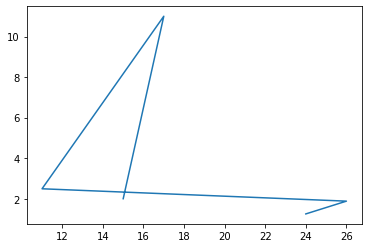

In [48]:
plt.plot(accident_counts, indexes)

In [ ]:
Lets look at vapour pressures:
    
    liquid      temp(celcius)  Vapour pressure
    Butane      25             0.601
    Ethane      -89            0.572       
    Propane     25             0.495
    isopropane   
    Ethylene    20             1.246
    Naphtha     15             0.667
    
    
    
  Reference : https://www.binmaster.com/_resources/dyn/files/75340090z876d0c14/_fn/Specific+Gravity.pdf  

## Introduce a time dependence to the analysis 


In [3]:

new_data = data[data['Accident Year'] != 2017];
#data['New Accident Year'].head(10)
accidents_per_year = new_data['Accident Year'].value_counts().sort_index();
accidents_per_year

2010    350
2011    345
2012    366
2013    401
2014    454
2015    462
2016    415
Name: Accident Year, dtype: int64

In [4]:
Accidents_Year_shifted_ints = accidents_per_year.astype(int)

In [15]:
Accidents_Year_shifted_ints.values


array([350, 345, 366, 401, 454, 462, 415,   2])

In [5]:
plot_df = pd.DataFrame( {'times':list(Accidents_Year_shifted_ints.index), 'No. Accidents':list(Accidents_Year_shifted_ints.values)} )

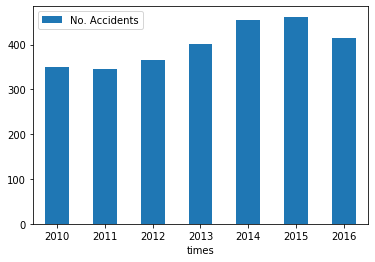

In [6]:
ax = plot_df.plot.bar(x='times', y='No. Accidents',rot=0)

In [ ]:
# The change in no. of pipeline accidents has trended upwards almost monotonically every year from 2010 at its peak in the US up to 2017.
# This looks to me like people in the industry making the decisions have NOt got any better since 2010 at preventing these accidents.

In [52]:
len(list(data['Accident Year Ints']))

2795

In [78]:
data[Accident_Year].value_counts().index

Int64Index([2015, 2014, 2016, 2013, 2012, 2010, 2011, 2017], dtype='int64')

In [79]:
data[Accident_Year].value_counts().index[0]

2015

In [84]:
data['Accident Year'].value_counts().index.values()

TypeError: 'numpy.ndarray' object is not callable

In [85]:
list(data[Accident_Year].value_counts().index)

[2015, 2014, 2016, 2013, 2012, 2010, 2011, 2017]

In [103]:
data[data[Liquid_Type] == 'HVL OR OTHER FLAMMABLE OR TOXIC FLUID, GAS'].groupby(Liquid_Subtype)[Net_Loss_Barrels].sum().sort_values(ascending=False)

Liquid Subtype
OTHER HVL                                                   133846.94
LPG (LIQUEFIED PETROLEUM GAS) / NGL (NATURAL GAS LIQUID)    115707.56
ANHYDROUS AMMONIA                                             2350.83
Name: Net Loss (Barrels), dtype: float64

In [106]:
data[data[Liquid_Explosion] == 'YES']


Report Number  Supplemental Number  Accident Year  Accident Date/Time  \
176        20100163                16455           2010   7/5/2010 10:40 AM   
392        20110076                15657           2011   2/8/2011 12:18 PM   
590        20110380                16653           2011    9/8/2011 7:50 AM   
674        20120011                17672           2011   12/8/2011 9:15 AM   
898        20120240                17441           2012   7/21/2012 5:35 PM   
953        20120284                20643           2012   9/13/2012 3:28 PM   
1178       20130153                20737           2013    4/1/2013 9:32 AM   
1340       20130307                20452           2013  8/12/2013 11:10 PM   
1751       20140318                21848           2014    8/6/2014 2:02 PM   
1849       20140440                21125           2014  10/28/2014 3:15 AM   
1911       20150025                20728           2014  12/24/2014 9:49 PM   
1912       20150026                21312           2014  12/25/2014 8:57 AM   
1951       20150071                21327           2015   1/26/2015 9:38 AM   
2453       20160088                21494           2016   2/24/2016 3:58 AM   
2758       20160418                22039           2016  11/29/2016 6:27 PM   

      Operator ID                      Operator Name  \
176          3445                     DIXIE PIPELINE   
392         31618  ENTERPRISE PRODUCTS OPERATING LLC   
590          2731               CHEVRON PIPE LINE CO   
674           300              PLAINS PIPELINE, L.P.   
898          2731               CHEVRON PIPE LINE CO   
953         31618  ENTERPRISE PRODUCTS OPERATING LLC   
1178        32147             MARATHON PIPE LINE LLC   
1340        31618  ENTERPRISE PRODUCTS OPERATING LLC   
1751        15774  NORTH DAKOTA PIPELINE COMPANY LLC   
1849        39010          BLUE RACER MIDSTREAM, LLC   
1911        30826            WILLIAMS FIELD SERVICES   
1912        32147             MARATHON PIPE LINE LLC   
1951        31618  ENTERPRISE PRODUCTS OPERATING LLC   
2453         3445         DIXIE PIPELINE COMPANY LLC   
2758        31618  ENTERPRISE PRODUCTS OPERATING LLC   

                  Pipeline/Facility Name Pipeline Location Pipeline Type  \
176                       DIXIE PIPELINE           ONSHORE   UNDERGROUND   
392     ENTERPRISE WEST STORAGE FACILITY           ONSHORE   ABOVEGROUND   
590                       WEST TEXAS LPG           ONSHORE   UNDERGROUND   
674                          JAL STATION           ONSHORE          TANK   
898   PT. ARTHUR TO MT. BELVIEU ETHYLENE           ONSHORE   ABOVEGROUND   
953                    SEMINOLE PIPELINE           ONSHORE   UNDERGROUND   
1178                  MARTINSVILLE CRUDE           ONSHORE   ABOVEGROUND   
1340      MAPL EAST LEG - MORRIS LATERAL           ONSHORE   UNDERGROUND   
1751                   ALEXANDER STATION           ONSHORE   ABOVEGROUND   
1849                 8" BERNE TO NATRIUM           ONSHORE   UNDERGROUND   
1911    OAK GROVE TO HOUSTON ETHANE LINE           ONSHORE   ABOVEGROUND   
1912                      CATLIN STATION           ONSHORE   ABOVEGROUND   
1951                              ATEX-1           ONSHORE   UNDERGROUND   
2453     MONT BELVIEU TO APEX (MAINLINE)           ONSHORE   UNDERGROUND   
2758                           EAST RED            ONSHORE   UNDERGROUND   

                                            Liquid Type  \
176          HVL OR OTHER FLAMMABLE OR TOXIC FLUID, GAS   
392          HVL OR OTHER FLAMMABLE OR TOXIC FLUID, GAS   
590          HVL OR OTHER FLAMMABLE OR TOXIC FLUID, GAS   
674                                           CRUDE OIL   
898          HVL OR OTHER FLAMMABLE OR TOXIC FLUID, GAS   
953          HVL OR OTHER FLAMMABLE OR TOXIC FLUID, GAS   
1178                                          CRUDE OIL   
1340         HVL OR OTHER FLAMMABLE OR TOXIC FLUID, GAS   
1751                                          CRUDE OIL   
1849         HVL OR OTHER FLAMMABLE O

In [67]:
Oilpipeline_1.time_cost_model_n_plot(data)

TypeError: list indices must be integers or slices, not str

In [24]:
Oilpipeline_1.do_checks_on_dataframe(data)

The dimansions of the tabular data are :(2795, 48)
The dataframe"s summary statistis are :
       Report Number  Supplemental Number  Accident Year   Operator ID  \
count   2.795000e+03          2795.000000    2795.000000   2795.000000   
mean    2.013293e+07         19433.319499    2013.187835  21388.476565   
std     1.982098e+04          1724.815370       1.972102  12430.973428   
min     2.010000e+07         15072.000000    2010.000000    300.000000   
25%     2.012004e+07         17978.500000    2012.000000  11169.000000   
50%     2.013037e+07         19502.000000    2013.000000  26041.000000   
75%     2.015023e+07         20996.500000    2015.000000  31618.000000   
max     2.017003e+07         22049.000000    2017.000000  99043.000000   

       Accident Latitude  Accident Longitude  Unintentional Release (Barrels)  \
count        2795.000000         2795.000000                      2795.000000   
mean           35.781608          -95.682691                       207.245843   

True

In [74]:
Oilpipeline_1.time_cost_model_n_plot(data)

TypeError: list indices must be integers or slices, not str